#  Assignment 2: Practical Machine Learning Project

## 1 Introduction

  For this project I have chosen Census Income Dataset of United States. This data contain individuals personal information like material status, education, age, income etc. detail of all attribute provided in following section. 

  Main motivation behind choosing this dataset is using this data we can build income predictor model base on individuals personal information. Which can use in various real life application. This predictor can be use by home loan or personal loan provider. With current circumstances they can predict future expected income base on individual current activity (for example individual doing Masters) and decide where do give him loan or not. Life coach can use this predictor to guide individual where he/she should take certain step or not  and it will be beneficial to individual or not. This predictor can be use by government agency to predict citizens future income expectations. This predictor will be significantly useful and time saver.


## 2 Exploration

In [2]:
import matplotlib.pyplot as plt
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
%matplotlib inline
import matplotlib.pyplot as plt

try:
    import netCDF4
except:
    !pip install netcdf4
    
try:
    import plotly
    major_plotly_version = int(plotly.__version__.split('.')[0])
    assert major_plotly_version >= 4
except:
    !pip install plotly==4.1.0
import plotly.express as px
import pandas as pd
import numpy as np
import seaborn as sns

### Import data

In [10]:
from sklearn.model_selection import train_test_split
census = pd.read_excel(r"C:/Users/Akshay/adult.xlsx")
census.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


### 2.1 Data Understanding

#### Brief summary of data which contain number of individual whose income is more than 50k and less than or equal to 50K

As we can see below dataset contain only 24.08% individuals who have income exceed than $50,000. So, this dataset is unbalance. 

In [142]:
recordsN = len(census)
moreThan50k = len(census.query('income == " >50K"'))
atMost50k = len(census.query('income == " <=50K"'))
MoreThan50kPercent = (float(moreThan50k) / recordsN * 100)

print("Total number of records: {}".format(recordsN))
print("individuals's income more than $50,000: {}".format(moreThan50k))
print("individuals's income is at most $50,000: {}".format(atMost50k))
print("Percentage of individuals's income exceeds $50,000: {:.2f}%".format(MoreThan50kPercent))

Total number of records: 32561
individuals's income more than $50,000: 7841
individuals's income is at most $50,000: 24720
Percentage of individuals's income exceeds $50,000: 24.08%


#### Below is Number of missing values per attribute 

In [143]:
def questionmark_number(x):
    return sum(x==' ?')
census.apply(questionmark_number)

age                  0
workclass         1836
fnlwgt               0
education            0
education.num        0
marital.status       0
occupation        1843
relationship         0
race                 0
sex                  0
capital.gain         0
capital.loss         0
hours.per.week       0
native country     583
income               0
dtype: int64

#### In a dataset between workclass and occupation attribute there is no common value existed except unknown values which denoted by question mark. As shown below there are 1836 rows whose value are the same for both workclass and occupation attribute.  which mean in 1836 rows have unknown value of both workclass and occupation attributes.

In [136]:
moreThan50k = len(census.query('workclass == occupation'))
print("Total number of records: {}".format(moreThan50k))

Total number of records: 1836


### 2.2 Attributes Property Summaries

#### 2.2.1 Work Class

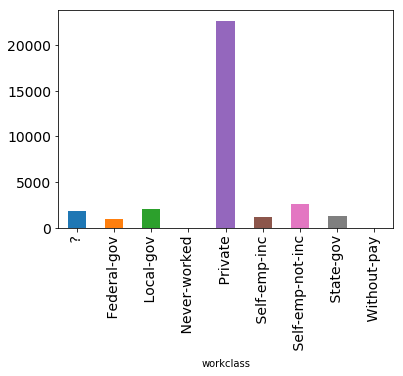

In [56]:
census.groupby(["workclass"]).size().plot(kind="bar",fontsize=14)

#### 2.2.2 Education

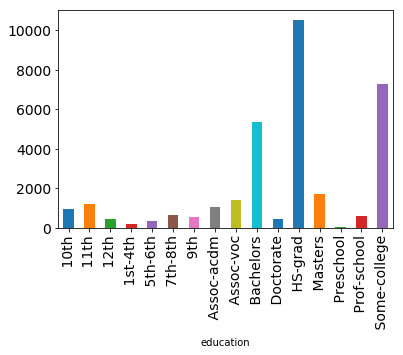

In [57]:
census.groupby(["education"]).size().plot(kind="bar",fontsize=14)

#### 2.2.3 Marital Status

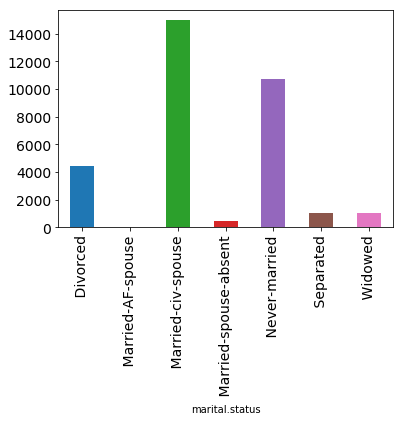

In [58]:
census.groupby(["marital.status"]).size().plot(kind="bar",fontsize=14)

#### 2.2.4 Occupation

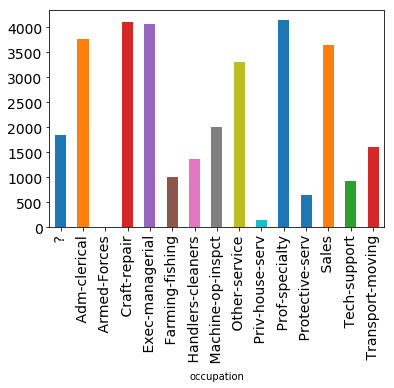

In [59]:
census.groupby(["occupation"]).size().plot(kind="bar",fontsize=14)

#### 2.2.5 Relationship

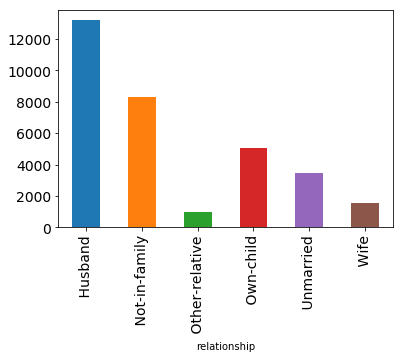

In [60]:
census.groupby(["relationship"]).size().plot(kind="bar",fontsize=14)

#### 2.2.6 Race

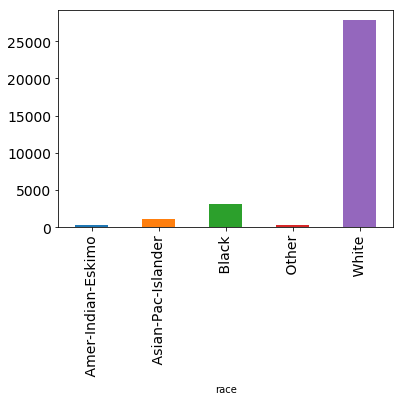

In [61]:
census.groupby(["race"]).size().plot(kind="bar",fontsize=14)

#### 2.2.7 Sex

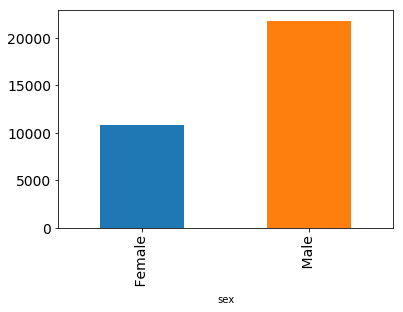

In [62]:
census.groupby(["sex"]).size().plot(kind="bar",fontsize=14)

#### 2.2.8 Native Country

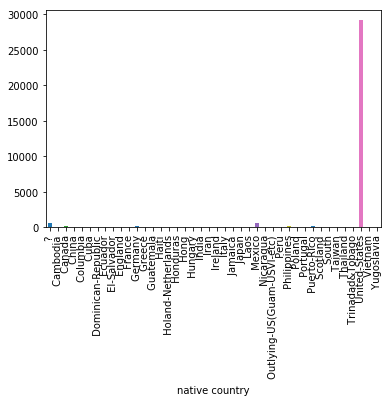

In [67]:
census.groupby(["native country"]).size().plot(kind="bar",fontsize=10)

#### 2.2.9 hours of work done by individuals

In [80]:
maxHr = census['hours.per.week'].max()
minHr = census['hours.per.week'].min()
avg   = census['hours.per.week'].mean()
med   = census['hours.per.week'].median()
rang  = maxHr - minHr 

print("Maximum hours of work done by individuals: {}".format(maxHr))
print("Minimum hours of work done by individuals: {}".format(minHr))
print("Mean: {}".format(avg))
print("Median: {}".format(med))
print("Range: {}".format(rang))

Maximum hours of work done by individuals: 99
Minimum hours of work done by individuals: 1
Mean: 40.437455852092995
Median: 40.0
Range: 98


#### 2.2.10 Capital Loss

In [83]:
maxCL = census['capital.loss'].max()
minCL = census['capital.loss'].min()
avg   = census['capital.loss'].mean()
med   = census['capital.loss'].median()

print("Maximum capital loss: $ {}".format(maxCL))
print("Minimum capital loss: $ {}".format(minCL))
print("Mean: {}".format(avg))
print("Median: {}".format(med))

Maximum capital loss: $ 4356
Minimum capital loss: $ 0
Mean: 87.303829734959
Median: 0.0


#### 2.2.11 Capital Gain

In [85]:
maxCG = census['capital.gain'].max()
minCG = census['capital.gain'].min()
avg   = census['capital.gain'].mean()
med   = census['capital.gain'].median()

print("Maximum capital Gain: $ {}".format(maxCG))
print("Minimum capital Gain: $ {}".format(minCG))
print("Mean: {}".format(avg))
print("Median: {}".format(med))

Maximum capital Gain: $ 99999
Minimum capital Gain: $ 0
Mean: 1077.6488437087312
Median: 0.0


#### 2.2.12 fnlwgt

In [86]:
maxfnlwgt = census['fnlwgt'].max()
minfnlwgt = census['fnlwgt'].min()
avg   = census['fnlwgt'].mean()
med   = census['fnlwgt'].median()

print("Maximum fnlwgt: {}".format(maxfnlwgt))
print("Minimum fnlwgt: {}".format(minfnlwgt))
print("Mean: {}".format(avg))
print("Median: {}".format(med))

Maximum fnlwgt: 1484705
Minimum fnlwgt: 12285
Mean: 189778.36651208502
Median: 178356.0


#### 2.2.13 Education number

In [87]:
maxEN = census['education.num'].max()
minEN = census['education.num'].min()
avg   = census['education.num'].mean()
med   = census['education.num'].median()

print("Maximum Education number: {}".format(maxEN))
print("Minimum Education number: {}".format(minEN))
print("Mean: {}".format(avg))
print("Median: {}".format(med))

Maximum Education number: 16
Minimum Education number: 1
Mean: 10.0806793403151
Median: 10.0


#### 2.2.14 Age

In [106]:
maxAge = census['age'].max()
minAge = census['age'].min()
avg   = census['age'].mean()
med   = census['age'].median()
rang  = maxAge - minAge 

print("Maximum Age: {}".format(maxAge))
print("Minimum Age: {}".format(minAge))
print("Mean: {}".format(avg))
print("Median: {}".format(med))
print("Range: {}".format(rang))

Maximum Age: 90
Minimum Age: 17
Mean: 38.58164675532078
Median: 37.0
Range: 73


### 2.3 Dataset Exploration

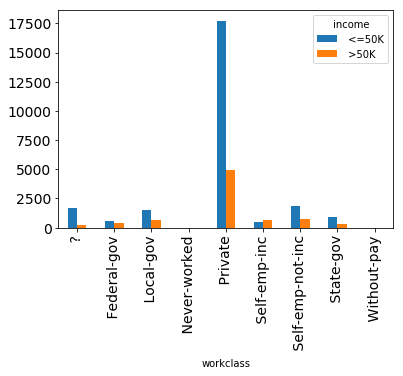

In [88]:
census.groupby(["income","workclass"]).size().unstack("income").plot(kind="bar",fontsize=14)

In above graph we can clearly see in all workclass except self-emp-inc there are more individuals who have <=50K income. 

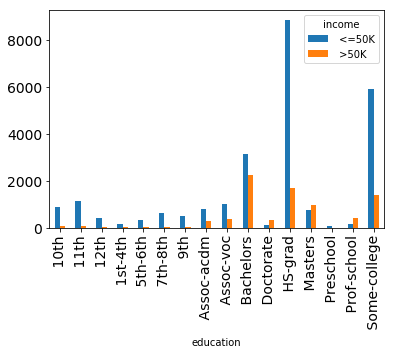

In [95]:
census.groupby(["income","education"]).size().unstack("income").plot(kind="bar",fontsize=14)

As shown in above graph there is more less than equal to fifty thousand dollars income individuals in all education level studied except number of Doctorate, Masters and Prof-school education level studied individuals income ratio in opposite to the rest of education attribute.   

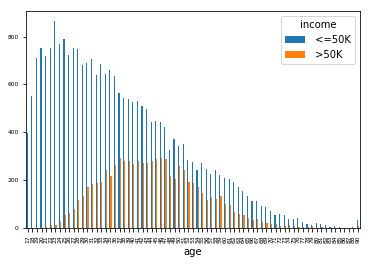

In [107]:
census.groupby(["age","income"]).size().unstack("income").plot(kind="bar",fontsize=6)

In above graph we can clearly see number of individuals who have income less than equal to 50 thousand tend to decrease as age increase. Individuals Whose income is greater than fifty thousand tend to more between age 31 to 53.

In [109]:
census.pivot_table(df, index=['income'], aggfunc=np.mean)

,age,capital.gain,capital.loss,education.num,fnlwgt,hours.per.week
income,,,,,,
<=50K,36.783738,148.752468,53.142921,9.595065,190340.86517,38.840210
>50K,44.249841,4006.142456,195.001530,11.611657,188005.00000,45.473026


Above table contain mean value of attribute with relation to the income. Interestingly individuals whose income is >50K work more hours than who earn <=50K.

### 2.4 Data pre-processing and transformation

From Data Understanding section there is 1836 rows who have unknown values of both workclass and occupation attribute. As this two attributes are one of most important attributes for creating model. I have choose to drop those rows whose both workclass and occupation attributes values are unknown.

In [197]:
census.drop(census[census['workclass'] == ' ?'].index, inplace = True) 
recordsN = len(census)
print("New Total number of records: {}".format(recordsN))
print("New number of missing values per attribute:")
      
def questionmark_number(x):
    return sum(x==' ?')
census.apply(questionmark_number)

New Total number of records: 30725
New number of missing values per attribute:


age                 0
workclass           0
fnlwgt              0
education           0
education.num       0
marital.status      0
occupation          7
relationship        0
race                0
sex                 0
capital.gain        0
capital.loss        0
hours.per.week      0
native country    556
income              0
dtype: int64

Convert sex to the numeric value as it will improve the model performance

In [198]:
gender_num = {' Male': 1, ' Female': 0}
census['sex'] = census['sex'].map(gender_num)
census.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,1,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,1,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,1,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,1,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,0,0,0,40,Cuba,<=50K


This is Census Income Data Set of United States. Most of individuals native country is United States. And also native country of individual does not affect the income of individual. So, I have decided to drop native country column.

In [200]:
del census['native country']
census.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,1,2174,0,40,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,1,0,0,13,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,1,0,0,40,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,1,0,0,40,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,0,0,0,40,<=50K


#### As our model will target only two value ‘>50K’ or ‘<=50K’ we will convert this value into binary target. As Logistic regression is built off of a logistic or sigmoid curve which looks like S shape. This will always be between zero and one and it makes it a much better fit for binary classification problem. To use logistic regression we need to convert all attribute value into numeric format.  

Convert workclass into numeric values

In [201]:
census['workclass'] = census['workclass'].map({' Without-pay':0,' Never-worked':1, ' Local-gov':2,' State-gov':3, ' Federal-gov':3, ' Private':4, ' Self-emp-not-inc':5, ' Self-emp-inc':6})
census.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,income
0,39,3,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,1,2174,0,40,<=50K
1,50,5,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,1,0,0,13,<=50K
2,38,4,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,1,0,0,40,<=50K
3,53,4,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,1,0,0,40,<=50K
4,28,4,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,0,0,0,40,<=50K


Convert enducation into numeric value

In [202]:
census['education'] = census['education'].map({' Preschool':0,' 1st-4th':1,' 5th-6th':2, ' 7th-8th':3,' 9th':4, ' 10th':5, ' 11th':6, ' 12th':7,
                                       ' Prof-school':8,' HS-grad':9, ' Some-college':10, ' Assoc-voc':11, ' Assoc-acdm':12,
                                       ' Bachelors':13, ' Masters':14, ' Doctorate':15})
census.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,income
0,39,3,77516,13,13,Never-married,Adm-clerical,Not-in-family,White,1,2174,0,40,<=50K
1,50,5,83311,13,13,Married-civ-spouse,Exec-managerial,Husband,White,1,0,0,13,<=50K
2,38,4,215646,9,9,Divorced,Handlers-cleaners,Not-in-family,White,1,0,0,40,<=50K
3,53,4,234721,6,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,1,0,0,40,<=50K
4,28,4,338409,13,13,Married-civ-spouse,Prof-specialty,Wife,Black,0,0,0,40,<=50K


Convert marital status into numeric value

In [203]:
census['marital.status'] = census['marital.status'].map({' Never-married':0,' Widowed':1,' Divorced':2, ' Separated':3,
                                      ' Married-spouse-absent':4, ' Married-civ-spouse':5, ' Married-AF-spouse':6})
census.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,income
0,39,3,77516,13,13,0,Adm-clerical,Not-in-family,White,1,2174,0,40,<=50K
1,50,5,83311,13,13,5,Exec-managerial,Husband,White,1,0,0,13,<=50K
2,38,4,215646,9,9,2,Handlers-cleaners,Not-in-family,White,1,0,0,40,<=50K
3,53,4,234721,6,7,5,Handlers-cleaners,Husband,Black,1,0,0,40,<=50K
4,28,4,338409,13,13,5,Prof-specialty,Wife,Black,0,0,0,40,<=50K


Convert occupation into numeric value

In [211]:
census['occupation'] = census['occupation'].map({' ?':-1,' Priv-house-serv':0,' Protective-serv':1,' Handlers-cleaners':2, ' Machine-op-inspct':3,
                                      ' Adm-clerical':4, ' Farming-fishing':5, ' Transport-moving':6, ' Craft-repair':7, ' Other-service':8,
                                       ' Tech-support':9, ' Sales':10, ' Exec-managerial':11, ' Prof-specialty':12, ' Armed-Forces':13 })
census.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,income
0,39,3,77516,13,13,0,4,Not-in-family,White,1,2174,0,40,<=50K
1,50,5,83311,13,13,5,11,Husband,White,1,0,0,13,<=50K
2,38,4,215646,9,9,2,2,Not-in-family,White,1,0,0,40,<=50K
3,53,4,234721,6,7,5,2,Husband,Black,1,0,0,40,<=50K
4,28,4,338409,13,13,5,12,Wife,Black,0,0,0,40,<=50K


Convert relationship into numeric value

In [212]:
census['relationship'] = census['relationship'].map({' Unmarried':0,' Other-relative':1, ' Not-in-family':2, ' Wife':3,
                                                     ' Husband':4,' Own-child':5})
census.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,income
0,39,3,77516,13,13,0,4,2,White,1,2174,0,40,<=50K
1,50,5,83311,13,13,5,11,4,White,1,0,0,13,<=50K
2,38,4,215646,9,9,2,2,2,White,1,0,0,40,<=50K
3,53,4,234721,6,7,5,2,4,Black,1,0,0,40,<=50K
4,28,4,338409,13,13,5,12,3,Black,0,0,0,40,<=50K


Convert race into numeric value

In [213]:
census['race'] = census['race'].map({' Black':0,' Asian-Pac-Islander':1,' Amer-Indian-Eskimo':2, ' Other':3,' White':4})
census.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,income
0,39,3,77516,13,13,0,4,2,4,1,2174,0,40,<=50K
1,50,5,83311,13,13,5,11,4,4,1,0,0,13,<=50K
2,38,4,215646,9,9,2,2,2,4,1,0,0,40,<=50K
3,53,4,234721,6,7,5,2,4,0,1,0,0,40,<=50K
4,28,4,338409,13,13,5,12,3,0,0,0,0,40,<=50K


Convert income income into numeric value

In [223]:
census['income'] = census['income'].map({' <=50K':0,' >50K':1})
census.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,income
0,39,3,77516,13,13,0,4,2,4,1,2174,0,40,0
1,50,5,83311,13,13,5,11,4,4,1,0,0,13,0
2,38,4,215646,9,9,2,2,2,4,1,0,0,40,0
3,53,4,234721,6,7,5,2,4,0,1,0,0,40,0
4,28,4,338409,13,13,5,12,3,0,0,0,0,40,0


#### Write out cleaned data

In [224]:
census.to_csv('C:/Users/Akshay/census_cleaned.csv', index=False)

In [38]:
new_census = pd.read_csv('C:/Users/Akshay/census_cleaned.csv')
new_census.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,income
0,39,3,77516,13,13,0,4,2,4,1,2174,0,40,0
1,50,5,83311,13,13,5,11,4,4,1,0,0,13,0
2,38,4,215646,9,9,2,2,2,4,1,0,0,40,0
3,53,4,234721,6,7,5,2,4,0,1,0,0,40,0
4,28,4,338409,13,13,5,12,3,0,0,0,0,40,0


#### Split into train, validation and test set

Below code split new cleaned dataset into to three parts training dataset, validation dataset and testing dataset. For training we will use 60% of data. For validation and testing we will use 20% data each.

In [39]:
features = new_census.drop('income', axis=1)
labels = new_census['income']

X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.4, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_test, y_test, test_size=0.5, random_state=42)

In [41]:
for dataset in [y_train, y_val, y_test]:
    print(round(len(dataset) / len(labels), 2))

0.6
0.2
0.2


#### Write out all data

In [228]:
X_train.to_csv('C:/Users/Akshay/train_features.csv', index=False)
X_val.to_csv('C:/Users/Akshay/val_features.csv', index=False)
X_test.to_csv('C:/Users/Akshay/test_features.csv', index=False)

y_train.to_csv('C:/Users/Akshay/train_labels.csv', index=False)
y_val.to_csv('C:/Users/Akshay/val_labels.csv', index=False)
y_test.to_csv('C:/Users/Akshay/test_labels.csv', index=False)

## 3. Methodology

We are going use GridSearchCV tool to do grid search within K-fold cross validation in order to fit optimal hyperparameter settings for all classifier that generate model on our data

#### Import libraries  

In [59]:
import joblib
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingClassifier
import warnings
warnings.filterwarnings('ignore', category=FutureWarning)
warnings.filterwarnings('ignore', category=DeprecationWarning)

tr_features = pd.read_csv('C:/Users/Akshay/train_features.csv')
tr_labels = pd.read_csv('C:/Users/Akshay/train_labels.csv', header=None)

#### Hyperparameter tuning

This function which will print out the result little bit more cleanly. For every hyperparameter combination print out average accuracy score across a five fold in our five fold cross validation and it will also print out standard deviation of five accuracy code. So this will give us all information we need  to select the optimal hyper parameter setting

In [14]:
def print_results(results):
    print('BEST PARAMS: {}\n'.format(results.best_params_))

    means = results.cv_results_['mean_test_score']
    stds = results.cv_results_['std_test_score']
    for mean, std, params in zip(means, stds, results.cv_results_['params']):
        print('{} (+/-{}) for {}'.format(round(mean, 3), round(std * 2, 3), params))

### 3.1 Implementation of Logistic regression

As target value of model is binary. Logistic regression is a one of the best classifier for this type of problem.

In [55]:
lr = LogisticRegression()
parameters = {
    'C': [ 0.01, 0.1, 1, 10, 100, 1000, 2000]
}

cv = GridSearchCV(lr, parameters, cv=5)
cv.fit(tr_features, tr_labels.values.ravel())

print_results(cv)

BEST PARAMS: {'C': 1000}

0.789 (+/-0.002) for {'C': 0.01}
0.789 (+/-0.002) for {'C': 0.1}
0.789 (+/-0.002) for {'C': 1}
0.789 (+/-0.002) for {'C': 10}
0.79 (+/-0.003) for {'C': 100}
0.79 (+/-0.004) for {'C': 1000}
0.789 (+/-0.002) for {'C': 2000}


#### Picking best estimator model

As we can see with hyperparameter C = 1000 given best logistic regression estimator with 79% accuracy rate.

In [46]:
cv.best_estimator_

LogisticRegression(C=1000, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

#### Write down best estimator model

In [48]:
joblib.dump(cv.best_estimator_, 'C:/Users/Akshay/LR_model.pkl')

['C:/Users/Akshay/LR_model.pkl']

### 3.2 Implementation of random forest classifier

In [57]:
rf = RandomForestClassifier()
parameters = {
    'n_estimators': [5, 50, 250],
    'max_depth': [2, 4, 8, 16, 32, None]
}

cv = GridSearchCV(rf, parameters, cv=5)
cv.fit(tr_features, tr_labels.values.ravel())

print_results(cv)

BEST PARAMS: {'max_depth': 16, 'n_estimators': 250}

0.811 (+/-0.04) for {'max_depth': 2, 'n_estimators': 5}
0.811 (+/-0.014) for {'max_depth': 2, 'n_estimators': 50}
0.814 (+/-0.014) for {'max_depth': 2, 'n_estimators': 250}
0.833 (+/-0.013) for {'max_depth': 4, 'n_estimators': 5}
0.841 (+/-0.008) for {'max_depth': 4, 'n_estimators': 50}
0.842 (+/-0.005) for {'max_depth': 4, 'n_estimators': 250}
0.851 (+/-0.008) for {'max_depth': 8, 'n_estimators': 5}
0.852 (+/-0.005) for {'max_depth': 8, 'n_estimators': 50}
0.854 (+/-0.004) for {'max_depth': 8, 'n_estimators': 250}
0.846 (+/-0.003) for {'max_depth': 16, 'n_estimators': 5}
0.855 (+/-0.007) for {'max_depth': 16, 'n_estimators': 50}
0.856 (+/-0.008) for {'max_depth': 16, 'n_estimators': 250}
0.832 (+/-0.008) for {'max_depth': 32, 'n_estimators': 5}
0.849 (+/-0.007) for {'max_depth': 32, 'n_estimators': 50}
0.849 (+/-0.007) for {'max_depth': 32, 'n_estimators': 250}
0.833 (+/-0.007) for {'max_depth': None, 'n_estimators': 5}
0.848 (+/-0.

#### Picking best estimator model

Random forest classifier give best estimator for our problem when max depth is 16 and number of estimator is 250. It gives 85.6% accuracy

In [58]:
cv.best_estimator_

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=16, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=250, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

#### Write down best estimator model

In [16]:
joblib.dump(cv.best_estimator_, 'C:/Users/Akshay/RF_model.pkl')

['C:/Users/Akshay/RF_model.pkl']

### 3.2 Implementation of Multilayer Perceptron

In [17]:
mlp = MLPClassifier()
parameters = {
    'hidden_layer_sizes': [(10,), (50,), (100,)],
    'activation': ['relu', 'tanh', 'logistic'],
    'learning_rate': ['constant', 'invscaling', 'adaptive']
}

cv = GridSearchCV(mlp, parameters, cv=5)
cv.fit(tr_features, tr_labels.values.ravel())

print_results(cv)

BEST PARAMS: {'activation': 'relu', 'hidden_layer_sizes': (100,), 'learning_rate': 'adaptive'}

0.745 (+/-0.133) for {'activation': 'relu', 'hidden_layer_sizes': (10,), 'learning_rate': 'constant'}
0.659 (+/-0.412) for {'activation': 'relu', 'hidden_layer_sizes': (10,), 'learning_rate': 'invscaling'}
0.773 (+/-0.01) for {'activation': 'relu', 'hidden_layer_sizes': (10,), 'learning_rate': 'adaptive'}
0.674 (+/-0.425) for {'activation': 'relu', 'hidden_layer_sizes': (50,), 'learning_rate': 'constant'}
0.66 (+/-0.412) for {'activation': 'relu', 'hidden_layer_sizes': (50,), 'learning_rate': 'invscaling'}
0.46 (+/-0.516) for {'activation': 'relu', 'hidden_layer_sizes': (50,), 'learning_rate': 'adaptive'}
0.672 (+/-0.418) for {'activation': 'relu', 'hidden_layer_sizes': (100,), 'learning_rate': 'constant'}
0.776 (+/-0.011) for {'activation': 'relu', 'hidden_layer_sizes': (100,), 'learning_rate': 'invscaling'}
0.779 (+/-0.015) for {'activation': 'relu', 'hidden_layer_sizes': (100,), 'learning

#### Picking best estimator model

With hidden layer size 100 and learning rate adaptive Multilayer Perceptron gives best estimator for our problem. With this settings it's gives 77.9% accuracy.

In [18]:
cv.best_estimator_

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(100,), learning_rate='adaptive',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
       random_state=None, shuffle=True, solver='adam', tol=0.0001,
       validation_fraction=0.1, verbose=False, warm_start=False)

#### Write down best estimator model

In [19]:
joblib.dump(cv.best_estimator_, 'C:/Users/Akshay/MLP_model.pkl')

['C:/Users/Akshay/MLP_model.pkl']

### 3.2 Implementation of Gradient Boosting Classifier

In [67]:
gb = GradientBoostingClassifier()
parameters = {
    'n_estimators': [5, 50, 250, 500],
    'max_depth': [1, 3, 5, 7, 9],
    'learning_rate': [0.01, 0.1, 1, 10, 100]
}

cv = GridSearchCV(gb, parameters, cv=5)
cv.fit(tr_features, tr_labels.values.ravel())

print_results(cv)

BEST PARAMS: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 250}

0.751 (+/-0.0) for {'learning_rate': 0.01, 'max_depth': 1, 'n_estimators': 5}
0.751 (+/-0.0) for {'learning_rate': 0.01, 'max_depth': 1, 'n_estimators': 50}
0.8 (+/-0.004) for {'learning_rate': 0.01, 'max_depth': 1, 'n_estimators': 250}
0.838 (+/-0.004) for {'learning_rate': 0.01, 'max_depth': 1, 'n_estimators': 500}
0.751 (+/-0.0) for {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 5}
0.796 (+/-0.006) for {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 50}
0.85 (+/-0.006) for {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 250}
0.857 (+/-0.009) for {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 500}
0.751 (+/-0.0) for {'learning_rate': 0.01, 'max_depth': 5, 'n_estimators': 5}
0.806 (+/-0.005) for {'learning_rate': 0.01, 'max_depth': 5, 'n_estimators': 50}
0.856 (+/-0.008) for {'learning_rate': 0.01, 'max_depth': 5, 'n_estimators': 250}
0.863 (+/-0.009) for {'learning_rate': 0.01,

#### Picking best estimator model

Gradient Boosting's best estimator model gives 86.4% accuracy with learning rate 0.1, max steps 3, number of estimators 250 settings.

In [68]:
cv.best_estimator_

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=250,
              n_iter_no_change=None, presort='auto', random_state=None,
              subsample=1.0, tol=0.0001, validation_fraction=0.1,
              verbose=0, warm_start=False)

#### Write down best estimator model

In [23]:
joblib.dump(cv.best_estimator_, 'C:/Users/Akshay/GB_model.pkl')

['C:/Users/Akshay/GB_model.pkl']

## Evaluation

#### Read in data

In [49]:
from sklearn.metrics import accuracy_score, precision_score, recall_score
from time import time

val_features = pd.read_csv('C:/Users/Akshay/val_features.csv')
val_labels = pd.read_csv('C:/Users/Akshay/val_labels.csv', header=None)

te_features = pd.read_csv('C:/Users/Akshay/test_features.csv')
te_labels = pd.read_csv('C:/Users/Akshay/test_labels.csv', header=None)

#### Read in models

In [50]:
models = {}

for mdl in [ 'LR', 'RF', 'MLP', 'GB']:
    models[mdl] = joblib.load('C:/Users/Akshay/{}_model.pkl'.format(mdl))

In [51]:
models

{'LR': LogisticRegression(C=1000, class_weight=None, dual=False, fit_intercept=True,
           intercept_scaling=1, max_iter=100, multi_class='warn',
           n_jobs=None, penalty='l2', random_state=None, solver='warn',
           tol=0.0001, verbose=0, warm_start=False),
 'RF': RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
             max_depth=16, max_features='auto', max_leaf_nodes=None,
             min_impurity_decrease=0.0, min_impurity_split=None,
             min_samples_leaf=1, min_samples_split=2,
             min_weight_fraction_leaf=0.0, n_estimators=250, n_jobs=None,
             oob_score=False, random_state=None, verbose=0,
             warm_start=False),
 'MLP': MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
        beta_2=0.999, early_stopping=False, epsilon=1e-08,
        hidden_layer_sizes=(100,), learning_rate='adaptive',
        learning_rate_init=0.001, max_iter=200, momentum=0.9,
        n_iter_no_c

#### Evaluate models on the validation set

As mention in data understanding section this data set is unbalanced. So, With accuracy rate we need to consider F-score to choose best model. As shown below MLP have lowest 78.3% accuracy and 25.3% F-score. Linear regression model perform slightly better than MLP with 79.4% accuracy and 40.5% F-score. Whereas Random forest and Gradient Boosting perform really well on validation set. Random forest model achieve 86.2% accuracy and 69.4% F-score and Gradient Boosting model achieve 87% accuracy and 71.5% F-score. As Gradient Boosting model have highest score for both accuracy and F-score. It is best model for our problem.

In [69]:
def evaluate_model(name, model, features, labels):
    start = time()
    pred = model.predict(features)
    end = time()
    accuracy = round(accuracy_score(labels, pred), 3)
    precision = round(precision_score(labels, pred), 3)
    recall = round(recall_score(labels, pred), 3)
    fscore = round(2 * (precision * recall) / (precision + recall), 3)
    print('{} -- Accuracy: {} / Precision: {} / Recall: {} / F-score: {}'
    .format(name, accuracy, precision, recall, fscore))

In [70]:
for name, mdl in models.items():
    evaluate_model(name, mdl, val_features, val_labels)

LR -- Accuracy: 0.794 / Precision: 0.723 / Recall: 0.281 / F-score: 0.405
RF -- Accuracy: 0.862 / Precision: 0.775 / Recall: 0.629 / F-score: 0.694
MLP -- Accuracy: 0.783 / Precision: 0.876 / Recall: 0.148 / F-score: 0.253
GB -- Accuracy: 0.87 / Precision: 0.789 / Recall: 0.653 / F-score: 0.715


#### Evaluate best model on test set

In this section we evaluate gradient boosting model on test set. On test set our model achieved 86.9% Accuracy, 79.1% precision, 64.4% Recall and 71% F-score. Which is fairly good score to become successful model for our problem.  

In [71]:
evaluate_model('Gradient Boosting', models['GB'], te_features, te_labels)

Gradient Boosting -- Accuracy: 0.869 / Precision: 0.791 / Recall: 0.644 / F-score: 0.71


## Conclusion

Using this model there can be lot of improvement in lifestyle of individual can happen. Since he/she will know how personal decision of their life will affect their income. It will help to track person their goals and step toward that.
Base on what type of industry and software we are going to use our predictor. We could consider other property of model such as Latency. For example if we are using predictor for life coach’s website. It might be more important to have less latency than high accuracy. So, we can choose model accordingly. 


## Ethical

This project/model adobe utilitarian approach as this predictor designed to be useful rather than attractive. It’s might not feel attractive to predict income of individual by his/her personal information. But it can be greatly useful for banking industry especially for loan purpose. Also it can be used by life coach trainer and by government agencies.  This project also follow some certain of Kantian duty-based approach. As this project does not propose rightness or wrongness of having greater than 50K or less than 50K income. Instead output base on individual own preferred way. For example some individual want to spend more time with family. In order to do that he can choose working less hours. And he/she might get less than 50K income. But he/she will be fulfil the desire. There is no potential misuses of this technique.  